In [1]:
from data.dataset import REFLACXWithClinicalDataset
from model.xami import XAMIMultiModal, XAMIMultiCocatModal
import torch
import os 
from utils.train import split_dataset, train_with_auc_margin_loss


In [2]:
# checking if the GPU is available
use_gpu = torch.cuda.is_available()

# setting up the device
device = 'cuda' if use_gpu else 'cpu'

print(f"Will be using {device}")


Will be using cuda


In [3]:
# load the dataset
reflacx_dataset = REFLACXWithClinicalDataset(image_size=256)

# keep the architecture simple, so we check the image nn first.
# prepare the model
xami_mutlimodal = XAMIMultiCocatModal(
    reflacx_dataset,
    device,
    use_clinical=True,
    model_dim=32, # was 64
    embeding_dim=64,
    dropout=.2,  # increase the dropout rate did improve the regularization. # from .3
    pretrained=True,
    detach_image=True,
)

without_clinical_model = 'test_0_8162_epoch300_WithoutClincal_dim32_2022-02-07 21_43_31_353207 '


all_weights = torch.load(os.path.join('saved_models', without_clinical_model ), map_location=device)

all_k = list(all_weights.keys())

for k in all_k:
    if not 'image_net' in k:
        all_weights.pop(k)


xami_mutlimodal.load_state_dict(all_weights, strict=False)

# xami_mutlimodal.load_state_dict(torch.load(os.path.join('saved_models', without_clinical_model ), map_location=device), strict=False)

xami_mutlimodal = xami_mutlimodal.to(device)


Positive Loss weight:
[0.768546   0.78635013 0.7937685  0.8338279  0.87388724]
Negative Loss weight:
[0.231454   0.21364985 0.20623146 0.1661721  0.12611276]
Random Loss:
0.21026036153991162


In [4]:
xami_mutlimodal.num_all_params()

7043749

In [5]:
batch_size = 64

dataloaders = split_dataset(
    reflacx_dataset,
    batch_size,
    traing_portion=.7,
    test_portion=.15,
    seed=234 #changed
)

In [6]:
# lr = 1e-2

# optimizer = optim.Adam(
#     xami_mutlimodal.parameters(),
#     lr=lr,
#     weight_decay=1e-6
# )

# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,
#                                                  patience=10,
#                                                  threshold=1e-3,
#                                                  factor=0.5
#                                                  )

## scheduler = None


In [14]:
# xami_mutlimodal.detach_image = False

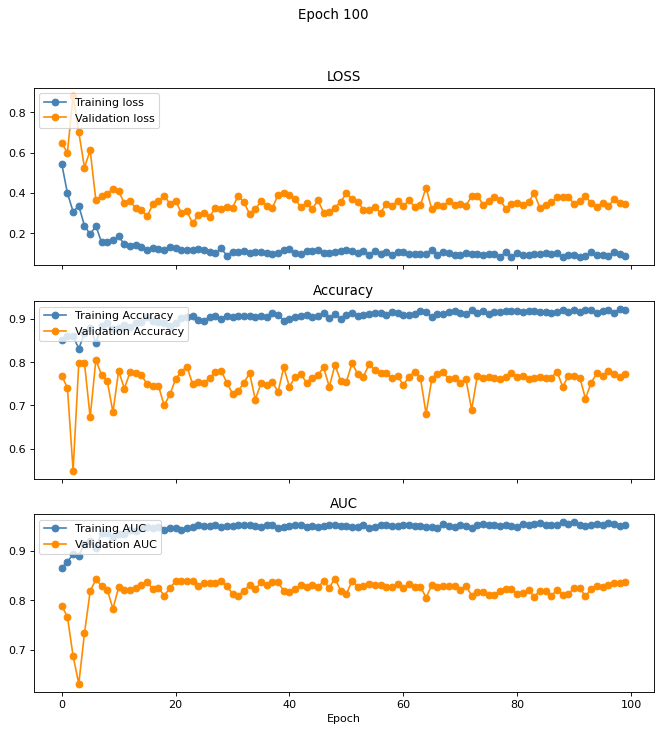


====================Current Learning Rate====================
| 0.02 

====================Training Result====================
| LOSS 0.0882 | ACC 0.9210 | AUC  0.9520 

| Training Confusion Matrix 

| Enlarged cardiac silhouette 
              Pred_False  Pred_True
Target_False         341         13
Target_True            3        114

| Atelectasis 
              Pred_False  Pred_True
Target_False         346         15
Target_True            0        110

| Pleural abnormality 
              Pred_False  Pred_True
Target_False         325         50
Target_True            3         93

| Consolidation 
              Pred_False  Pred_True
Target_False         331         64
Target_True            2         74

| Pulmonary edema 
              Pred_False  Pred_True
Target_False         384         32
Target_True            4         51

====================Validation Result====================
| LOSS 0.3465 | ACC 0.7725 | AUC  0.8362 

| Validation Confusion Matrix 

| Enlarged cardi

In [15]:
# With clinical
train_data_1, val_data_1, test_data_1, model_names = train_with_auc_margin_loss(
    num_epochs=100,
    model=xami_mutlimodal,
    dataloaders=dataloaders,
    dataset=reflacx_dataset,
    device=device,
    lr=1e-1,
    # scheduler_freq=None,
)


# detach first. # then train

In [8]:
# wieght chekcing.
# xami_mutlimodal.image_net.model_ft.features.conv0.weight.grad.sum()

In [9]:
# xami_mutlimodal = XAMIMultiModal(
#     reflacx_dataset,
#     device,
#     use_clinical=False,
#     model_dim=32, # was 64
#     embeding_dim=64,
#     dropout=.2,  # increase the dropout rate did improve the regularization. # from .3
#     pretrained=True
# )

# xami_mutlimodal = xami_mutlimodal.to(device)

In [10]:
# # Without clinical
# train_data_2, val_data_2, test_data_2 = train_with_auc_margin_loss(
#     num_epochs=300,
#     model=xami_mutlimodal,
#     dataloaders=dataloaders,
#     dataset=reflacx_dataset,
#     device=device,
#     lr=1e-1,
# )

In [11]:
# train_data, val_data = train_with_auc_margin_loss(
#     num_epochs=300,
#     model=xami_mutlimodal,
#     dataloaders=dataloaders,
#     lr=0.1,
#     dataset=reflacx_dataset,
#     device=device,
# )
